LOADING DATASET-2 AND IMAGE PREPROCESSING

In [ ]:
import os
import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split

# Define the classes and path
files = ['NORMAL', 'COVID', 'VIRAL PNEUMONIA']
path = "/content/drive/MyDrive/dataset_2"
data_dir = os.path.join(path)

# Create the dataset DataFrame
data = []
for level in files:
    level_path = os.path.join(data_dir, level, 'images')
    for file in os.listdir(level_path):
        data.append([os.path.join(level, 'images', file), level])

data = pd.DataFrame(data, columns=['image_file', 'disease_result'])
data['path'] = path + '/' + data['image_file']

# Map labels to numerical values
label_mapping = {
    'NORMAL': 0,
    'COVID': 1,
    'VIRAL PNEUMONIA': 2
}
data['label'] = data['disease_result'].map(label_mapping)

# Preprocess images
def preprocess_image(image_path, target_size=(224, 224)):
    img = cv2.imread(image_path)
    img = cv2.resize(img, target_size)
    img = img / 255.0  # Normalize to [0, 1]
    return img

# Apply preprocessing to all images
images = []
labels = []

total_images = len(data)
for index, row in data.iterrows():
    img = preprocess_image(row['path'])
    images.append(img)
    labels.append(row['label'])

    # Progress indicator
    if (index + 1) % 100 == 0 or (index + 1) == total_images:
        print(f"Processed {index + 1}/{total_images} images... {total_images - (index + 1)} remaining.")

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

print(f"Images shape: {images.shape}")
print(f"Labels shape: {labels.shape}")


# Split the data
x_train, x_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42, stratify=labels)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"x_train shape: {x_train.shape}")
print(f"x_val shape: {x_val.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"y_test shape: {y_test.shape}")


# Directory where arrays will be saved
save_directory = '/content/drive/MyDrive/D2_latest'
os.makedirs(save_directory, exist_ok=True)

# File paths
x_train_path = os.path.join(save_directory, 'x_train.npy')
x_val_path = os.path.join(save_directory, 'x_val.npy')
x_test_path = os.path.join(save_directory, 'x_test.npy')
y_train_path = os.path.join(save_directory, 'y_train.npy')
y_val_path = os.path.join(save_directory, 'y_val.npy')
y_test_path = os.path.join(save_directory, 'y_test.npy')

# Save arrays
np.save(x_train_path, x_train)
np.save(x_val_path, x_val)
np.save(x_test_path, x_test)
np.save(y_train_path, y_train)
np.save(y_val_path, y_val)
np.save(y_test_path, y_test)

print(f"Data saved to {save_directory}")



Processed 100/3635 images... 3535 remaining.
Processed 200/3635 images... 3435 remaining.
Processed 300/3635 images... 3335 remaining.
Processed 400/3635 images... 3235 remaining.
Processed 500/3635 images... 3135 remaining.
Processed 600/3635 images... 3035 remaining.
Processed 700/3635 images... 2935 remaining.
Processed 800/3635 images... 2835 remaining.
Processed 900/3635 images... 2735 remaining.
Processed 1000/3635 images... 2635 remaining.
Processed 1100/3635 images... 2535 remaining.
Processed 1200/3635 images... 2435 remaining.
Processed 1300/3635 images... 2335 remaining.
Processed 1400/3635 images... 2235 remaining.
Processed 1500/3635 images... 2135 remaining.
Processed 1600/3635 images... 2035 remaining.
Processed 1700/3635 images... 1935 remaining.
Processed 1800/3635 images... 1835 remaining.
Processed 1900/3635 images... 1735 remaining.
Processed 2000/3635 images... 1635 remaining.
Processed 2100/3635 images... 1535 remaining.
Processed 2200/3635 images... 1435 remainin

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


images are resized and normalized and data is split into test-train-validation sets and saved to drive

In [ ]:
import os
import numpy as np

# Directory where arrays are saved
directory = '/content/drive/MyDrive/D2_latest'

# File paths
x_train_path = os.path.join(directory, 'x_train.npy')
x_val_path = os.path.join(directory, 'x_val.npy')
x_test_path = os.path.join(directory, 'x_test.npy')
y_train_path = os.path.join(directory, 'y_train.npy')
y_val_path = os.path.join(directory, 'y_val.npy')
y_test_path = os.path.join(directory, 'y_test.npy')

# Load arrays
x_train = np.load(x_train_path)
x_val = np.load(x_val_path)
x_test = np.load(x_test_path)
y_train = np.load(y_train_path)
y_val = np.load(y_val_path)
y_test = np.load(y_test_path)

# Print shapes to confirm successful loading
print(f"x_train shape: {x_train.shape}")
print(f"x_val shape: {x_val.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"y_test shape: {y_test.shape}")


x_train shape: (2544, 224, 224, 3)
x_val shape: (545, 224, 224, 3)
x_test shape: (546, 224, 224, 3)
y_train shape: (2544,)
y_val shape: (545,)
y_test shape: (546,)


Converting labels to one-hot encodings for further training

In [ ]:
from tensorflow.keras.utils import to_categorical

num_classes = 3  # As you have two classes: 0 and 1
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)

print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)


y_train shape: (2544, 3)
y_val shape: (545, 3)


**TRAINING**
1. VGG16 MODEL



In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

# Assuming x_train, y_train, x_val, y_val are already defined

# Set the number of classes
num_classes = 3  # Replace with the actual number of classes

# Load the base VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Define the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks: early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(filepath='vgg16_model.keras', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

# Reshape y_train and y_val if necessary and convert labels to one-hot encoded format
# Assuming original shape of y_train and y_val is (None, 4, 4, 4)
# y_train = to_categorical(y_train, num_classes=num_classes) # Convert to one-hot encoding
# y_val = to_categorical(y_val, num_classes=num_classes)   # Convert to one-hot encoding


# Initial training phase
print("Starting initial training phase...")
history = model.fit(x_train, y_train,
                    validation_data=(x_val, y_val),
                    epochs=20,  # Example number of epochs
                    batch_size=64,
                    callbacks=[early_stopping, model_checkpoint])

# Fine-tuning phase
# Unfreeze some layers in the base model
for layer in base_model.layers[-4:]:  # Example: Unfreeze last 4 layers
    layer.trainable = True

# Re-compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training (fine-tuning)
print("Starting fine-tuning phase...")
history = model.fit(x_train, y_train,
                    validation_data=(x_val, y_val),
                    epochs=15,  # Example number of epochs
                    batch_size=64,
                    callbacks=[early_stopping, model_checkpoint])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Starting initial training phase...
Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 641ms/step - accuracy: 0.5417 - loss: 0.9350
Epoch 1: val_loss improved from inf to 0.48793, saving model to vgg16_model.keras
40/40 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.5453 - loss: 0.9304 - val_accuracy: 0.8073 - val_loss: 0.4879
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - accuracy: 0.8512 - loss: 0.4441
Epoch 2: val_loss improved from 0.48793 to 0.31512, saving model to vgg16_model.keras
40/40 ━━━━━━━━━━━━━━━━━━━━ 32s 329ms/step - accuracy: 0.8515 - loss: 0.4435 - val_accuracy: 0.8917 - val_loss: 0.3151
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.8893 - loss: 0.3318
Epoch 3: val_loss improved from 0.31512 to 0.27188, saving model to vgg16_model.keras
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 328ms/step - accuracy: 0.8893 - loss: 0.3316 - val_accuracy: 0.9101 - val_loss: 0.2719
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step

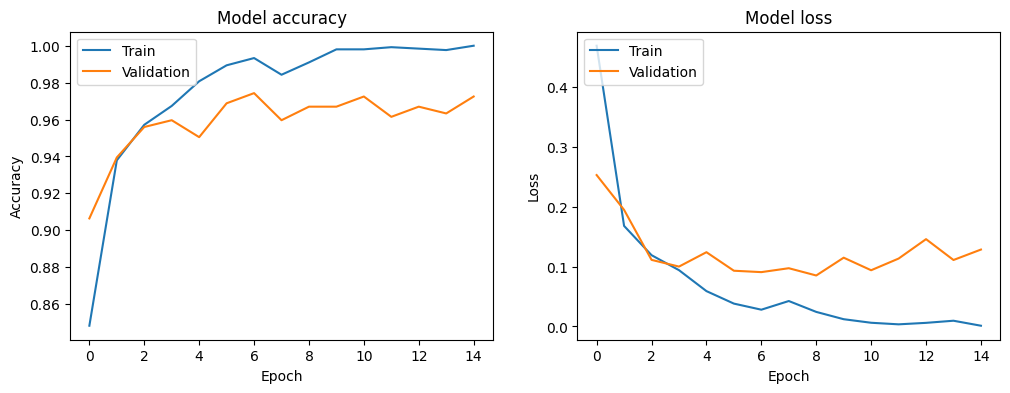

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])  # Plot accuracy from initial training
plt.plot(history.history['val_accuracy'])  # Plot validation accuracy from initial training
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])   # Plot loss from initial training
plt.plot(history.history['val_loss'])  # Plot validation loss from initial training
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
y_test_flat = to_categorical(y_test, num_classes=3)
loss, accuracy = model.evaluate(x_test, y_test_flat)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')


18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 283ms/step - accuracy: 0.9676 - loss: 0.0835
Test loss: 0.10760166496038437
Test accuracy: 0.9615384340286255


model is tested and saved to drive for making an ensemble model



In [ ]:
import os
import tensorflow as tf

# Define the folder path in Google Drive
folder_path = '/content/drive/MyDrive/Models'
model_filename = 'VGG16.keras'
save_path = os.path.join(folder_path, model_filename)

# Create the directory if it doesn't exist
os.makedirs(folder_path, exist_ok=True)

model.save(save_path)

print(f"Model saved to {save_path}")


Model saved to /content/drive/MyDrive/Models/VGG16.keras


2. RESNET50 MODEL

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical

# Load the ResNet50 model with pre-trained ImageNet weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
num_classes = 3
# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)  # Adjust num_classes based on your problem

# Define the complete model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
checkpoint = ModelCheckpoint(filepath='ResNet50.keras', save_best_only=True, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, mode='min')

# y_train = to_categorical(y_train, num_classes=num_classes)
# y_val = to_categorical(y_val, num_classes=num_classes) # Do the same for validation data

# Train the model
history = model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=30,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint, early_stop],
    verbose=1
)

# Fine-tuning: Unfreeze some layers and retrain
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Recompile the model after unfreezing
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

history_fine = model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=20,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint, early_stop],
    verbose=1
)


Epoch 1/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.3600 - loss: 1.3811
Epoch 1: val_loss improved from inf to 0.86554, saving model to ResNet50.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 37s 277ms/step - accuracy: 0.3608 - loss: 1.3784 - val_accuracy: 0.6440 - val_loss: 0.8655
Epoch 2/30
79/80 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.5638 - loss: 0.9207
Epoch 2: val_loss improved from 0.86554 to 0.76835, saving model to ResNet50.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 24s 149ms/step - accuracy: 0.5639 - loss: 0.9202 - val_accuracy: 0.6220 - val_loss: 0.7684
Epoch 3/30
79/80 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.6313 - loss: 0.8102
Epoch 3: val_loss improved from 0.76835 to 0.71830, saving model to ResNet50.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 25s 202ms/step - accuracy: 0.6315 - loss: 0.8101 - val_accuracy: 0.6569 - val_loss: 0.7183
Epoch 4/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.6606 - loss: 0.7631
Epoch 4: val_loss did not improve from 0.71830
80/80 ━━━━━━━

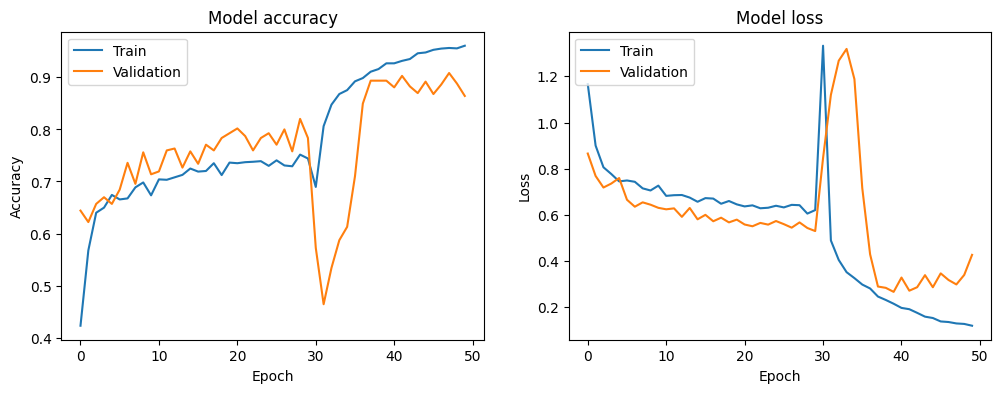

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'] + history_fine.history['accuracy'])
plt.plot(history.history['val_accuracy'] + history_fine.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'] + history_fine.history['loss'])
plt.plot(history.history['val_loss'] + history_fine.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [ ]:
y_test_flat = to_categorical(y_test, num_classes=3)
loss, accuracy = model.evaluate(x_test, y_test_flat)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')


18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 215ms/step - accuracy: 0.9239 - loss: 0.2256
Test loss: 0.2641810178756714
Test accuracy: 0.9120879173278809


In [ ]:
import os
import tensorflow as tf

# Define the folder path in Google Drive
folder_path = '/content/drive/MyDrive/Models'
model_filename = 'ResNet50.keras'
save_path = os.path.join(folder_path, model_filename)

# Create the directory if it doesn't exist
os.makedirs(folder_path, exist_ok=True)

model.save(save_path)

print(f"Model saved to {save_path}")


Model saved to /content/drive/MyDrive/Models/ResNet50.keras



3. ENSEMBLE MODEL OF  RESNET50 + VGG16 MODELS


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved models
vgg16_model = load_model('/content/drive/MyDrive/Models/VGG16.keras')
resnet50_model = load_model('/content/drive/MyDrive/Models/ResNet50.keras')


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
# Assuming x_val and y_val are your validation data and labels
vgg16_preds = vgg16_model.predict(x_val)
resnet50_preds = resnet50_model.predict(x_val)

# Combine predictions
combined_preds = np.hstack((vgg16_preds, resnet50_preds))


18/18 ━━━━━━━━━━━━━━━━━━━━ 18s 229ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 281ms/step


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Flatten the combined predictions if necessary
combined_preds_flat = combined_preds.reshape(combined_preds.shape[0], -1)

# Train the meta-model
meta_model = LogisticRegression(max_iter=1000)
meta_model.fit(combined_preds_flat, np.argmax(y_val, axis=1))  # Assuming y_val is one-hot encoded

# Predict with the meta-model
meta_preds = meta_model.predict(combined_preds_flat)


In [ ]:
# Calculate the accuracy
meta_accuracy = accuracy_score(np.argmax(y_val, axis=1), meta_preds)
print(f"Stacking Model Accuracy: {meta_accuracy}")


Stacking Model Accuracy: 0.9688073394495413


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Logistic Regression
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga']  # Note: some solvers may not support certain penalties
}

# Initialize the Logistic Regression meta-model
meta_model = LogisticRegression(max_iter=1000)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=meta_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(combined_preds_flat, np.argmax(y_val, axis=1))

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Best Cross-Validation Score: 0.9688073394495413


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
150 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
-----------------------------------------------------------

In [ ]:
# Train the meta-model with the best parameters
best_meta_model = LogisticRegression(**best_params, max_iter=1000)
best_meta_model.fit(combined_preds_flat, np.argmax(y_val, axis=1))

# Predict with the best meta-model
meta_preds = best_meta_model.predict(combined_preds_flat)

# Evaluate the stacking model
meta_accuracy = accuracy_score(np.argmax(y_val, axis=1), meta_preds)
print(f"Stacking Model Accuracy with Best Params: {meta_accuracy}")


Stacking Model Accuracy with Best Params: 0.9706422018348624


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

# Convert y_val to class indices
y_val_classes = np.argmax(y_val, axis=1)

# Evaluate the meta-classifier on the validation set
print(classification_report(y_val_classes, meta_preds, target_names=['NORMAL', 'COVID', 'VIRAL PNEUMONIA']))

# Generate the confusion matrix
cm = confusion_matrix(y_val_classes, meta_preds)
print("Confusion Matrix:\n", cm)

# Save the meta-classifier
meta_model_path = '/content/drive/MyDrive/Models/meta_classifier.pkl'
joblib.dump(best_meta_model, meta_model_path)
print(f"Meta-model saved to {meta_model_path}")

                 precision    recall  f1-score   support

         NORMAL       0.96      0.97      0.96       181
          COVID       0.99      0.99      0.99       183
VIRAL PNEUMONIA       0.97      0.95      0.96       181

       accuracy                           0.97       545
      macro avg       0.97      0.97      0.97       545
   weighted avg       0.97      0.97      0.97       545

Confusion Matrix:
 [[176   1   4]
 [  0 181   2]
 [  8   1 172]]
Meta-model saved to /content/drive/MyDrive/Models/meta_classifier.pkl


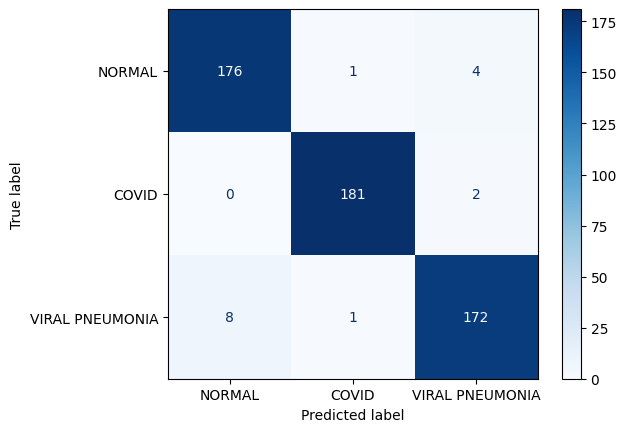

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay  # Import ConfusionMatrixDisplay

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['NORMAL', 'COVID', 'VIRAL PNEUMONIA'])
disp.plot(cmap=plt.cm.Blues)
plt.show()